Stage 1 Data Understanding

This stage aims to replicate the basic analysis undertaken by Turcotte et al. to verify results and get a basic undertanding of data structure, content and format.


LANL Unified Host and Network Data Set analysis (Turcotte, Kent and Hash, 2018) @ https://arxiv.org/pdf/1708.07518.pdf

Events Types

| EventID | Description |
| :--- | :--- |
| 4768 | Kerberos authentication ticket was requested (TGT) |
| 4769 | Kerberos service ticket was requested (TGS) |
| 4770 | Kerberos service ticket was renewed |
| 4774 | An account was mapped for logon |
| 4776 | The domain controller attempted to validate credentials |
| 4624 | An account was successfully logged on, see Logon Types |
| 4625 | An account failed to logon, see Logon Types |
| 4634 | An account was logged off, see Logon types |
| 4647 | User initiated logoff |
| 4648 | A logon was attempted using explicit credentials |
| 4672 | Special privileges assigned to a new logon |
| 4800 | The workstation was locked |
| 4801 | The workstation was unlocked |
| 4802 | The screensaver was invoked |
| 4803 | The screensaver was dismissedProcess events |
| 4688 | Process start |
| 4689 | Process end |
| 4608 | Windows is starting up |
| 4609 | Windows is shutting down |
| 1100 | Event lgging service has shut down(often recorded instead of EventID 4609) |

Logon Types

| Type | Description |
| - | - |
| 2 | Interactive |
| 5 | Service |
| 9 | NewCredentials |
| 3 | Network |
| 7 | Unlock |
| 10 | RemoteInteractive |
| 4 | Batch |
| 8 | NetworkClearText |
| 11 | CachedInteractive |
| 12 | CachedRemoteInteractive |
| 0 | Used only by the system account |

For full description of Windows Logging Service (WLS) event types see: https://www.ultimatewindowssecurity.com/securitylog/encyclopedia/default.aspx)

Event Fields (Note events contain the EventID, LogHost and Time fields plus other fields dependent of event type):

| Field | Description |
| :--- | :--- |
| Time | The epoch time of the event in seconds |
| EventID | Four digit integer corresponding to the event id of the record |
| LogHost | The hostname of the computer that the event was recorded on.  In the case of directed authen-tication events, the LogHostwill correspond to the computer that the authentication event is terminating at (destination computer) |
| LogonType | Integer corresponding to the type of logon, see Table 2 |
| LogonTypeDescription | Description of the LogonType, see Table 2 | 
| UserName | The user account initiating the event.  If the user ends in $, then it corresponds to a computer account for the specified computer |
| DomainName | Domain name of UserName |
| LogonID | A semi-unique (unique between current sessions andLogHost) number that identifies the logon session just initiated.  Any events logged subsequently during this logon session should report the same Logon ID through to the logoff event | 
| SubjectUserName | For authentication mapping events, the user account specified by this field is mapping to the user account in UserName | 
| SubjectDomainName | Domain name of SubjectUserName |
| SubjectLogonID | SeeLogonID |
| Status | Status of the authentication request.  “0x0” means success otherwise failure, see R. F. Smith for failure codes for the appropriate Event ID. | 
| Source | For  authentication  events,  this  will  correspond  to  the  the  computer  where  the  authentication originated (source computer), if it is a local logon event then this will be the same as the LogHost | 
| ServiceName | The account name of the computer or service the user is requesting the ticket for |
| Destination | This is the server the mapped credential is accessing.  This may indicate the local computer when starting another process with new account credentials on a local computer |
| AuthenticationPackage | The type of authentication occurring including Negotiate, Kerberos, NTLM plusa few more | FailureReason | The reason for a failed logon |
| ProcessName | The process executable name, for authentication events this is the process that processedthe authentication event ProcessNames may include the file type extensions (i.e exe). |
| ProcessID | A semi-unique (unique between currently running processes AND LogHost) value that identifies the process.  Process ID allows you to correlate other events logged in association with the same processthrough to the process end |
| ParentProcessName | The process executable that started the new process.  ParentProcessNames often do not have file extensions like ProcessName but can be compared by removing file extensions from the name | 
| ParentProcessID | Identifies the exact process that started the new process.  Look for a preceding event 4688 with a ProcessID that matches thisParentProcessID |

In [ ]:
# First check the processing speed and memory available to ensure there is enough
# grunt to run the code (at least 8GB memory & 4 cores @ 2.4Ghz)

import platform
import psutil

print("-"*20 + "Platform Infomrmation" + "-"*20)

print(platform.processor())
cores = psutil.cpu_count(logical=True)
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", cores)

cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz\n")

if(cores<4 or int(cpufreq.current)<2400):
    print("Warning: Processor speed limit! - This notebook requires at least 4 core @ 2.4Ghz")

print("CPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%\n")

svmem = psutil.virtual_memory()
print("Total Memory: " + str(svmem.total))
memAvailable = svmem.available
print ("Memory Available: " + str(memAvailable))
if (memAvailable<8e9):
    print("Warning: Not enough memory! - This notebook requires at least 8GBytes of free RAM")

In [112]:
# Import all required libraries, create a pointer to the LANL data directory and
# create a baseline timestsamp to allow processing time measurement

import os
import bz2
import pandas as pd
import json
from datetime import datetime
import os
from random import seed
from random import random
import hashlib 
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

plt.style.use('seaborn-whitegrid')

now = datetime.now()
dataDirectory = 'D:\\LANL\\2017\\'

In [ ]:
# This cell processes all LANL daily wls logs and creates new files containing wls logs for each hour
# of every day converted from compressed json to compressed csv (comma separated values) format.
# The csv format was chosen as it supports additional data import features in pandas

oijweoifjwfklf

start = datetime.now()

try:
    hour=0
    day=1
    maxSecs = 3600
    
    # Create a temporary file for storing hourly wls log data
    fOut = open(dataDirectory + 'temp\\tempFile', "w")
   
    # Cycle through daily wls logs and read data one row at a time
    for fileNum in range(day,day+90):
        fIn = bz2.BZ2File(dataDirectory + 'daily\\wls_day-' + str(fileNum).zfill(2) + '.bz2', 'r')
        row = fIn.readline().decode('utf-8')
        while(row):
            
            # When each hour of data has been read write hourly wls logs to disk as as compressed csv dataframes
            second = json.loads(line)["Time"]
            if (second == maxSecs):
                fOut.close()
                df = pd.read_json (dataDirectory + 'temp\\tempFile', orient='records', lines=True)
                df.to_csv(dataDirectory + 'hourly\\day' + str(day).zfill(2) + '_hr' + str(hour).zfill(2) \
                          + '_pd.bz2', compression = 'bz2')
                fOut = open(dataDirectory + 'temp\\tempFile', "w")
                hour=hour+1
                if (24==hour):
                    hour=0
                    day=day+1
                maxSecs=maxSecs+3600
                
            # Write current row to the temporary file and read the next row
            fOut.write(row)
            row = fIn.readline().decode('utf-8')
        fIn.close()
    fOut.close()
    
    # Write the last hourly wls log to disk
    df = pd.read_json (dataDirectory + 'temp\\tempFile', orient='records', lines=True)
    df.to_csv(dataDirectory + 'hourly\\day' + str(day).zfill(2) + '_hr' + str(hour).zfill(2) + '_pd.bz2', \
              compression = 'bz2')
         

except:
    print("Error Reading Data on Day: " + str(day) + ", Hour: " + str(hour) + " Second: " + str(second))
    print("Row: " + row)
    
finally:
    fIn.close()
    fOut.close()
    print("Time taken = " + datetime.now()-start) 

In [124]:
# Check a random day/hour file content

day=int(random()*90)
hour=int(random()*24)

randomFile = dataDirectory + 'hourly\\' + 'day' + str(day).zfill(2) + \
'_hr' + str(hour).zfill(2) + '_pd.bz2'

print('Day: ' + str(day) + ' Hour: ' + str(hour))
df = pd.read_csv(randomFile, compression='bz2', index_col=0)
df['ProcessName'].nunique()

Day: 35 Hour: 3


C:\Users\cjasm\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


490

In [133]:
df

,UserName,EventID,LogHost,LogonID,DomainName,ParentProcessName,ParentProcessID,ProcessName,Time,ProcessID,...,Source,FailureReason,Destination,SubjectUserName,SubjectLogonID,SubjectDomainName,ServiceName,TimeSlice,Hour,Day
0,Comp394086$,4688,Comp394086,0x3e7,Domain001,svchost,0x3f4,taskeng.exe,2948400,0x357c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914,3,35
1,Comp394086$,4688,Comp394086,0x3e7,Domain001,taskeng,0x357c,Proc857443.exe,2948400,0x3050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914,3,35
2,Comp394086$,4688,Comp394086,0x3e7,Domain001,csrss,0x1fc,conhost.exe,2948400,0xc14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914,3,35
3,Comp394086$,4688,Comp394086,0x3e7,Domain001,services,0x284,Proc857443.exe,2948400,0x2d38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914,3,35
4,Comp593332$,4688,Comp593332,0x3e7,Domain001,Proc336322,0x51c,cmd.exe,2948400,0x22b8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992530,Comp997424$,4688,Comp997424,0x3e7,Domain001,svchost,0x2fc,dllhost.exe,2951999,0xd5c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4919,3,35
1992531,Comp082217$,4688,Comp082217,0x3e7,Domain001,svchost,0x394,dllhost.exe,2951999,0x1f0d4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4919,3,35
1992532,Comp981899$,4688,Comp981899,0x3e7,Domain001,svchost,0x358,dllhost.exe,2951999,0x28bc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4919,3,35
1992533,Comp381619$,4688,Comp381619,0x3e7,Domain001,Proc461749,0xa9c,Proc461749.exe,2951999,0x1c64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4919,3,35


In [131]:
# Create simple functions for summarising data into time slices

def calcTimeSlice(secs):
    timeSlice = int(float(secs)/float(600))
    return timeSlice

def calcHour(secs):
    hour = int(float(secs)/(60*60))%24
    return hour

def calcDay(secs):
    day = int(float(secs)/(60*60*24))+1
    return day

In [132]:
df['TimeSlice'] = df['Time'].apply(calcTimeSlice)
df['Hour'] = df['Time'].apply(calcHour)
df['Day'] = df['Time'].apply(calcDay)

In [128]:
groupCols=['TimeSlice', 'Hour', 'UserName']
aggregate = OrderedDict([('ProcessName', [lambda x: tuple(x),'count']),\
                             ('LogHost', [lambda x: set(x)]),\
                             ('Time', [np.min,np.max])])
    
procSumm=(df.groupby(groupCols).agg(aggregate).reset_index())
procSumm.columns=['TimeSlice', 'Hour', 'User', 'Processes', 'ProcCount', 'Computers', 'TimeMin', 'TimeMax']


In [129]:
procSumm

,TimeSlice,Hour,User,Processes,ProcCount,Computers,TimeMin,TimeMax
0,4914,3,ActiveDirectory$,"(nan, nan, taskeng.exe, taskeng.exe, nan, nan,...",114,{ActiveDirectory},2948400,2948998
1,4914,3,Administrator,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",44,"{Comp652409, Comp564857, Comp571028, Comp74799...",2948400,2948999
2,4914,3,Anonymous,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0,"{Comp652409, Comp564857, Comp263919, Comp74799...",2948400,2948999
3,4914,3,AppService,"(nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",500,"{Comp894088, Comp508178, Comp633715, Comp45744...",2948400,2948999
4,4914,3,Comp000116$,"(taskhost.exe, dllhost.exe, nan, nan, wmiprvse...",12,"{ActiveDirectory, Comp000116}",2948434,2948942
...,...,...,...,...,...,...,...,...
67042,4919,3,User999948,"(nan, nan, Proc211923.exe)",1,"{Comp457448, Comp501747}",2951726,2951975
67043,4919,3,local service,"(Proc791194.exe, Proc965106.exe, Proc323218.ex...",1243,"{Comp474112, Comp886544, Comp197394, Comp76454...",2951400,2951997
67044,4919,3,network service,"(services.exe, nan, services.exe, nan, nan, Pr...",4,"{Comp631742, Comp997424, Comp682831}",2951947,2951973
67045,4919,3,system,"(services.exe, nan, services.exe, nan, service...",421,"{Comp965759, Comp886544, Comp866419, Comp71781...",2951403,2951994


In [ ]:
procSumm['Processes']=procSumm['Processes'].apply(lambda x:set(x))
procSumm['UniqueProcesses']=procSumm['Processes'].apply(lambda x:len(x))
procSumm['UniqueComputers']=procSumm['Computers'].apply(lambda x:len(x))   
            
print("Time taken = " + datetime.now()-start) 

In [ ]:
# This cell cycles through the resulting hourly wls logs and creates per hour, unique entity 
# counts for users, computer accounts, log hosts, source hosts, event types, logontypes and 
# processes and density counts for events and logon types.  These counts are stored as a 
# dataframe and can then be verified against the analysis performed by Turcotte et al.

# Create new dataframes to hold entity and density counts
entityCntDf = pd.DataFrame(columns=['Day', 'Hour', 'UserName', 'CompAccount', 'LogHost', \
                                       'Source', 'ProcessName'])
entityCntDf.to_csv(dataDirectory+'Analysis\\entityCounts.csv', index=False)

eventDensityDf = pd.DataFrame(columns=['EventID', 'Count', 'Day', 'Hour'])
eventDensityDf.to_csv(dataDirectory+'Analysis\\eventDensityCounts.csv', index=False)
logonDensityDf = pd.DataFrame(columns=['LogonType', 'Count', 'Day', 'Hour'])
logonDensityDf.to_csv(dataDirectory+'Analysis\\logOnDensityCounts.csv', index=False)

del [entityCntDf, eventDensityDf, logonDensityDf]

# Cycle through each hour of wls logs and calculate entity and density counts
for day in range (1,91):
    for hour in range (0,24):
        start = datetime.now()
        hourlyDf = pd.read_csv(dataDirectory + 'hourly\\' + 'day' + str(day).zfill(2) + '_hr' + \
                               str(hour).zfill(2) + '_pd.bz2', compression='bz2', index_col=0)
        
        # Start check start and end times for consistency
        min = ((day-1)*24+hour)*3600
        max = ((day-1)*24+hour)*3600 + 3600
        if (hourlyDf.Time.min() < min or hourlyDf.Time.max() > max):
            print('Time bounds error!')
        # End check start and end times
        
        # Start create entity counts
        counts = hourlyDf[['LogHost', 'Source', 'ProcessName']].nunique()
        userName = hourlyDf[hourlyDf['UserName'].str.contains("User")==True]['UserName'].nunique()
        compAccount = hourlyDf['UserName'].nunique() - userName
        counts['Day'] = day
        counts['Hour'] = hour
        counts['UserName'] = userName
        counts['CompAccount'] = compAccount
        entityCntDf = pd.DataFrame(columns=['Day', 'Hour', 'UserName', 'CompAccount', 'LogHost', \
                                       'Source', 'ProcessName'])
        entityCntDf = entityCntDf.append(counts, ignore_index=True)
        entityCntDf.to_csv(dataDirectory+'Analysis\\entityCounts.csv', mode='a', header=False, index=False)
        # End create entity counts
        
        # Start create EventID density counts
        eventDensityDf = pd.DataFrame(hourlyDf.EventID.value_counts(ascending=True).reset_index())
        eventDensityDf = eventDensityDf.rename(columns={"index": "EventID", "EventID": "Count"})
        eventDensityDf['Day']=day
        eventDensityDf['Hour']=hour
        eventDensityDf.to_csv(dataDirectory+'Analysis\\eventDensityCounts.csv', mode='a', header=False, index=False)
        # End create EventID density counts
        
        # Start create LogonType density counts
        logonDensityDf=pd.DataFrame(hourlyDf.LogonType.value_counts(ascending=True).reset_index())
        logonDensityDf = logonDensityDf.rename(columns={"index": "LogonType", "LogonType": "Count"})
        logonDensityDf['Day']=day
        logonDensityDf['Hour']=hour
        logonDensityDf.to_csv(dataDirectory+'Analysis\\logonDensityCounts.csv', mode='a', header=False, index=False)
        # End create LogonType density counts
        
        del [entityCntDf, eventDensityDf, logonDensityDf, hourlyDf, counts]
        
        duration = datetime.now()-start
        print('\nDay: ' + str(day) + ', Hour: ' +  str(hour) + ' Processed')
        print('Time taken: ' + str(duration))
        print('Estimated time remaining: ' + str(((90-day)*24-hour)*duration))
        

In [ ]:
pd.read_json(dataDirectory + 'daily\\wls_day-62.bz2', compression='bz2', lines=True)

In [ ]:
# Histogram showing EventID counts in ascending order (for comparison with Turcotte et al.)

df.EventID.value_counts(ascending=True).to_frame().style.bar()

In [ ]:
# Histogram showing LogonTypes in ascending order (for comparison with Turcotte et al.)

df.LogonType.value_counts(ascending=True).to_frame().style.bar()

In [ ]:
# Hostogram of totals for LogHosts, UserNames, Sources and ProcessNames for comparison with Turcotte et al.

df[['LogHost', 'UserName', 'Source', 'ProcessName']].nunique().sort_values().to_frame().style.bar()

Stage 2 - Data Processing and Feature Engineering

This Stage aims to select a short list of promising approaches for data modelling and then complete any data preparation, curation, reduction and feature engineering

In [ ]:
# Filter all Process Start Events

df.loc[df['EventID'] == 4688 ].dropna(axis='columns', how='all')

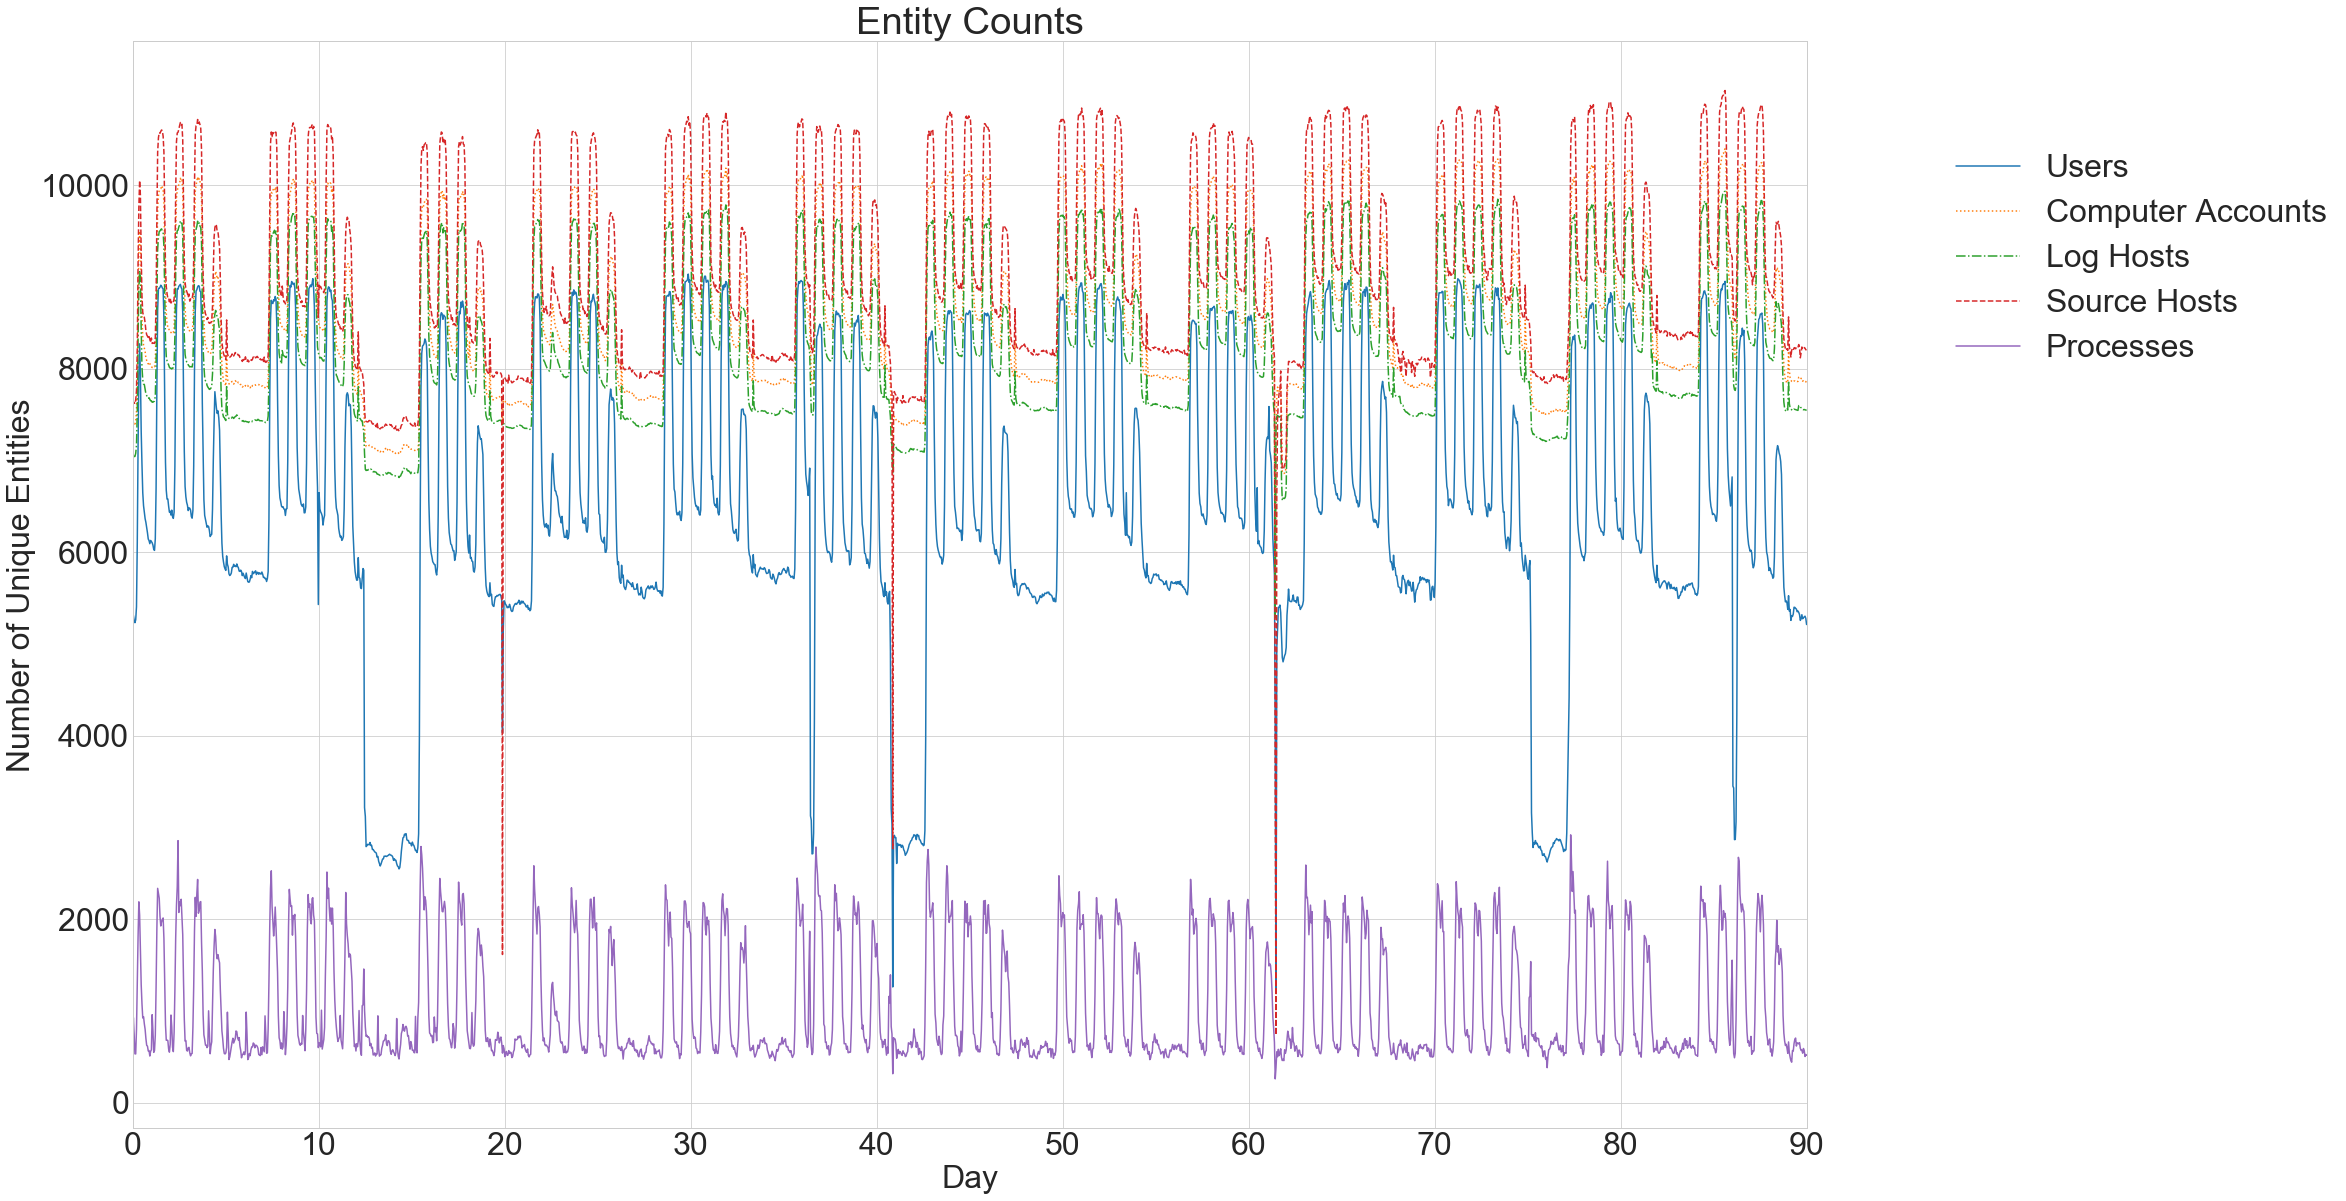

In [22]:
entityCntDf = pd.read_csv(dataDirectory + 'Analysis//entityCounts.csv', index_col=False)

fig = plt.figure(figsize=(30,20))
ax = plt.axes()
plt.rcParams.update({'font.size': 32})

plt.title("Entity Counts")
plt.ylabel("Number of Unique Entities")
plt.xlabel("Day")
plt.xlim(right=90)

x=np.linspace(0,90,len(entityCntDf))

ax.plot(x, entityCntDf.UserName.values, linestyle='solid', label='Users')
ax.plot(x, entityCntDf.CompAccount.values, linestyle='dotted', label='Computer Accounts')
ax.plot(x, entityCntDf.LogHost.values, linestyle='dashdot', label = 'Log Hosts')
ax.plot(x, entityCntDf.Source.values, linestyle='dashed', label = 'Source Hosts')
ax.plot(x, entityCntDf.ProcessName.values, label = 'Processes')

plt.legend(loc=10, bbox_to_anchor=(1.2,0.8))


In [25]:
logonDf = pd.read_csv(dataDirectory + 'Analysis\\logOnDensityCounts.csv')
logonDf

,LogonType,Count,Day,Hour
0,10.0,6,1,0
1,0.0,28,1,0
2,7.0,39,1,0
3,4.0,282,1,0
4,9.0,1015,1,0
...,...,...,...,...
20589,4.0,319,90,22
20590,8.0,2439,90,22
20591,2.0,3416,90,22
20592,5.0,4545,90,22


<BarContainer object of 11 artists>

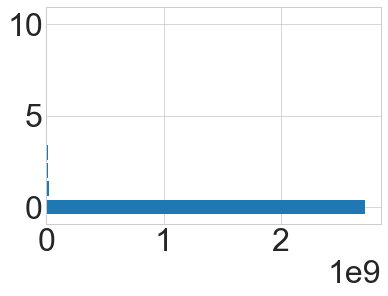

In [69]:
x=[]
y=[]
for x in logonDf.LogonType.unique():
    x.append(x)
    y.append(logonDf[logonDf['LogonType'] == x].Count.values.sum())
  

plt.barh(range(len(logonPlt)), logonPlt)   

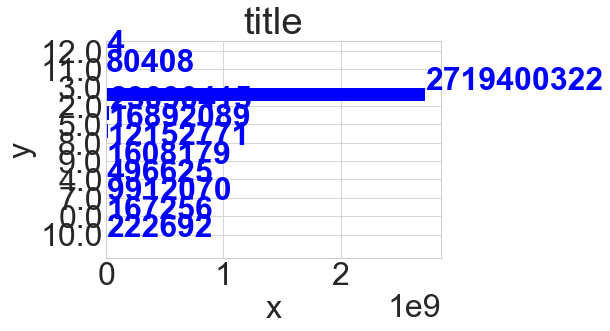

In [86]:
y=[]
x=logonDf.LogonType.unique()

for logon in x:
    y.append(logonDf[logonDf['LogonType'] == logon].Count.values.sum())

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
#plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

<BarContainer object of 11 artists>

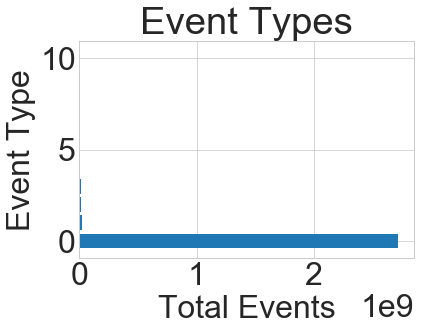

In [90]:
y=[]
x=logonDf.LogonType.unique()

for logon in x:
    y.append(logonDf[logonDf['LogonType'] == logon].Count.values.sum())

plt.title('Event Types')
plt.xlabel('Total Events')
plt.ylabel('Event Type')
  
y.sort(reverse=True)

plt.barh(range(len(y)), y)   

<BarContainer object of 20 artists>

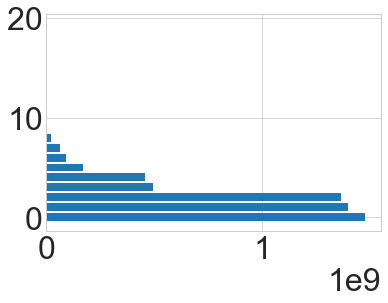

In [70]:
eventDf = pd.read_csv(dataDirectory + 'Analysis\\eventDensityCounts.csv')
eventPlt = []

for event in eventDf.EventID.unique():
    eventPlt.append(eventDf[eventDf['EventID'] == event].Count.values.sum())
  
eventPlt.sort(reverse=True)

plt.barh(range(len(eventPlt)), eventPlt)   

In [62]:
eventDf.EventID.unique()

array([1100, 4609, 4774, 4647, 4801, 4800, 4803, 4608, 4802, 4689, 4625,
       4648, 4768, 4769, 4672, 4776, 4634, 4624, 4688, 4770], dtype=int64)

In [64]:
(eventDf[eventDf['EventID'] == 4801].Count.values.sum())

2067668

In [51]:
len(logonPlt)

12

In [36]:
logonDf[logonDf['LogonType']].Count.values.sum().sort_values().to_frame().style.bar()

KeyError: "None of [Float64Index([10.0,  0.0,  7.0,  4.0,  9.0,  8.0,  5.0,  2.0,  3.0,  0.0,\n              ...\n               3.0,  0.0, 10.0,  7.0,  9.0,  4.0,  8.0,  2.0,  5.0,  3.0],\n             dtype='float64', length=20594)] are in the [columns]"